<a href="https://colab.research.google.com/github/Priyankaverma2024/Capstone-project-2_sentiment_analysis/blob/main/Capstone2_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's move forward
# Upload our saved .pkl files

In [1]:
from google.colab import files

# Upload .pkl files
uploaded = files.upload()


Saving X_train_resampled.pkl to X_train_resampled.pkl


In [2]:
#from google.colab import files

# Upload model/vectorizer files
uploaded = files.upload()


Saving y_train_resampled.pkl to y_train_resampled.pkl


In [3]:
from google.colab import files

# Upload model/vectorizer files
uploaded = files.upload()
#

Saving X_test.pkl to X_test.pkl


In [4]:
#from google.colab import files

# Upload model/vectorizer files
uploaded = files.upload()


Saving y_test.pkl to y_test.pkl


In [12]:
# from google.colab import files

# Upload model/vectorizer files
uploaded = files.upload()


Saving tfidf_vectorizer.pkl to tfidf_vectorizer.pkl


In [6]:
# from google.colab import files

# Upload model/vectorizer files
uploaded = files.upload()


Saving label_map.pkl to label_map.pkl


In [13]:
import joblib

# Load vectorized and SMOTE-balanced training data
X_train = joblib.load("X_train_resampled.pkl")
y_train = joblib.load("y_train_resampled.pkl")

# Load test data
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

# Load TF-IDF vectorizer
tfidf = joblib.load("tfidf_vectorizer.pkl")

label_map =joblib.load("label_map.pkl")


In [11]:
import os
print(os.listdir())


['.config', 'label_map.pkl', 'y_test.pkl', 'tfidf_vectorizer (1) (1).pkl', 'tfidf_vectorizer (1).pkl', 'X_test.pkl', 'X_train_resampled.pkl', 'y_train_resampled.pkl', 'sample_data']


# ✅ Train Multinomial Naive Bayes


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save the model
joblib.dump(nb_model, "nb_model.pkl")


['nb_model.pkl']

#✅ Evaluate Naive Bayes Model

In [15]:
# Load model
nb_model = joblib.load("nb_model.pkl")

# Predict
nb_preds = nb_model.predict(X_test)

# Evaluate
print("=== Naive Bayes Evaluation ===")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))


=== Naive Bayes Evaluation ===
Accuracy: 0.185
Confusion Matrix:
 [[  2  17   0]
 [  0  31   0]
 [  0 635 115]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.05      1.00      0.09        31
           2       1.00      0.15      0.27       750

    accuracy                           0.18       800
   macro avg       0.68      0.42      0.18       800
weighted avg       0.96      0.18      0.26       800



#✅ Train Support Vector Machine (SVM)

In [16]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

joblib.dump(svm_model, "svm_model.pkl")


['svm_model.pkl']

# ✅ Evaluate SVM Model

In [17]:
svm_model = joblib.load("svm_model.pkl")
svm_preds = svm_model.predict(X_test)

print("\n=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))



=== SVM Evaluation ===
Accuracy: 0.9475
Confusion Matrix:
 [[  2   0  17]
 [  0   6  25]
 [  0   0 750]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       1.00      0.19      0.32        31
           2       0.95      1.00      0.97       750

    accuracy                           0.95       800
   macro avg       0.98      0.43      0.50       800
weighted avg       0.95      0.95      0.93       800



# ✅ Train MLP Classifier (Neural Network)

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

joblib.dump(mlp_model, "mlp_model.pkl")


['mlp_model.pkl']

# ✅  Evaluate MLP Classifier

In [19]:
mlp_model = joblib.load("mlp_model.pkl")
mlp_preds = mlp_model.predict(X_test)

print("\n=== MLP Classifier Evaluation ===")
print("Accuracy:", accuracy_score(y_test, mlp_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, mlp_preds))
print("Classification Report:\n", classification_report(y_test, mlp_preds))



=== MLP Classifier Evaluation ===
Accuracy: 0.9475
Confusion Matrix:
 [[  2   0  17]
 [  0   6  25]
 [  0   0 750]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       1.00      0.19      0.32        31
           2       0.95      1.00      0.97       750

    accuracy                           0.95       800
   macro avg       0.98      0.43      0.50       800
weighted avg       0.95      0.95      0.93       800



#✅  Train XGBoost Classifier



In [20]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, "xgb_model.pkl")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['xgb_model.pkl']

# ✅  Evaluate XGBoost Classifier

In [21]:
xgb_model = joblib.load("xgb_model.pkl")
xgb_preds = xgb_model.predict(X_test)

print("\n=== XGBoost Evaluation ===")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))



=== XGBoost Evaluation ===
Accuracy: 0.94
Confusion Matrix:
 [[  1   0  18]
 [  0   1  30]
 [  0   0 750]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       1.00      0.03      0.06        31
           2       0.94      1.00      0.97       750

    accuracy                           0.94       800
   macro avg       0.98      0.36      0.38       800
weighted avg       0.94      0.94      0.91       800



# 🚀 Next Major Steps
✅ Step 1: Prepare Data for LSTM
(LSTM needs padded sequences, not TF-IDF — so we’ll use Tokenizer + Padding)

✅ Step 2: Build & Train LSTM Model
Using Keras (TensorFlow backend)

✅ Step 3: Evaluate LSTM on test data
Compare performance with your traditional models

✅ Step 4: Use the best model to predict on test_data_hidden.csv

# Preprocess Data for LSTM

In [23]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load original train.csv (with review text)
df = pd.read_csv('/content/train_data.csv')
df.head()

# Clean text if needed (basic lowercasing)
df['clean_text'] = df['reviews.text'].astype(str).str.lower()

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])  # Assuming 'sentiment' column

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=200)

# Split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(padded, df['label'], test_size=0.2, random_state=42)


# Build & Train LSTM Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
vocab_size = 10000
embedding_dim = 128
max_length = 200

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 classes: positive, neutral, negative
])

# Compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 459ms/step - accuracy: 0.8648 - loss: 0.5812 - val_accuracy: 0.9438 - val_loss: 0.2548
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 485ms/step - accuracy: 0.9379 - loss: 0.3035 - val_accuracy: 0.9438 - val_loss: 0.2476
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 465ms/step - accuracy: 0.9351 - loss: 0.2661 - val_accuracy: 0.9438 - val_loss: 0.2540
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 35s 391ms/step - accuracy: 0.9412 - loss: 0.1625 - val_accuracy: 0.9359 - val_loss: 0.2626
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 447ms/step - accuracy: 0.9551 - loss: 0.1118 - val_accuracy: 0.9344 - val_loss: 0.2955


# 📊 Evaluate LSTM Model

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Predict
lstm_preds_proba = model.predict(X_test_lstm)
lstm_preds = np.argmax(lstm_preds_proba, axis=1)

# Accuracy
print("✅ LSTM Accuracy:", accuracy_score(y_test_lstm, lstm_preds))

# Confusion Matrix
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test_lstm, lstm_preds))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test_lstm, lstm_preds, target_names=label_encoder.classes_))


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step
✅ LSTM Accuracy: 0.93875

🧾 Confusion Matrix:
 [[  0   0  13]
 [  0   0  36]
 [  0   0 751]]

📋 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Predict on Unseen Test Data(test_data_hidden.csv)

Load and Preprocess the File

In [26]:
# Load the unseen test data
unseen_df = pd.read_csv("/content/test_data (1).csv")

# Preprocess text (same as you did during training)
unseen_df['clean_text'] = unseen_df['reviews.text'].astype(str).str.lower()

# Convert text to sequences and pad
unseen_sequences = tokenizer.texts_to_sequences(unseen_df['clean_text'])
unseen_padded = pad_sequences(unseen_sequences, maxlen=200)


#✅ Predict Using the Trained LSTM Model



In [27]:
# Predict probabilities
unseen_preds_proba = model.predict(unseen_padded)

# Convert to class labels
unseen_preds = np.argmax(unseen_preds_proba, axis=1)

# Convert numeric predictions back to original labels
final_sentiments = label_encoder.inverse_transform(unseen_preds)

# Attach predictions to DataFrame
unseen_df['predicted_sentiment'] = final_sentiments


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step


# 💾 Save the Predictions to CSV

In [28]:
# Save to CSV
unseen_df.to_csv("final_predictions_on_unseen_data.csv", index=False)

print("✅ Predictions saved to 'final_predictions_on_unseen_data.csv'")


✅ Predictions saved to 'final_predictions_on_unseen_data.csv'


# Accuracy Comparison Bar Plot

<ipython-input-29-412b74ea73a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="Blues_d")
<ipython-input-29-412b74ea73a3>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


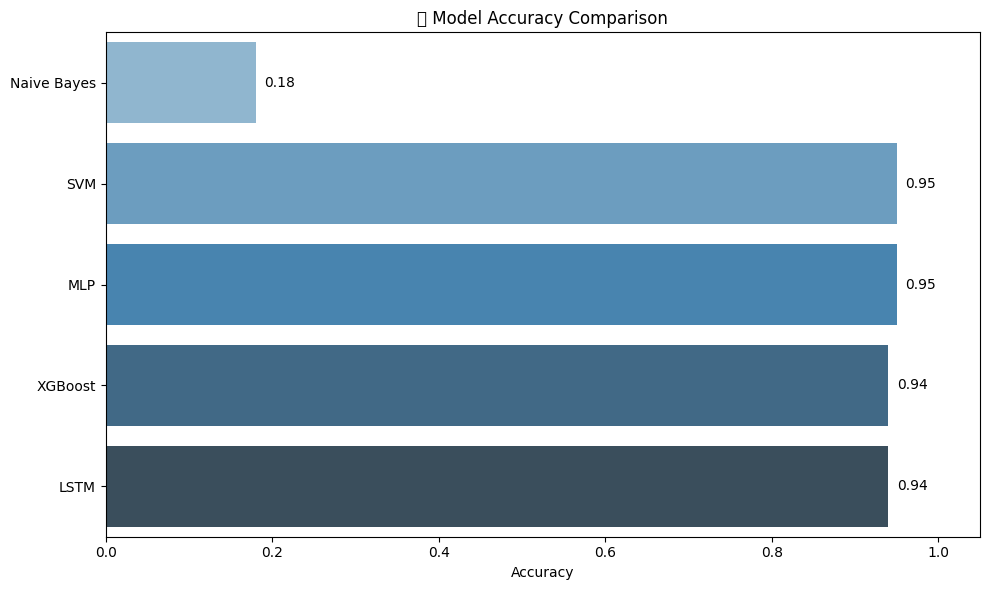

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy values
model_names = ['Naive Bayes', 'SVM', 'MLP', 'XGBoost', 'LSTM']
accuracies = [0.18, 0.95, 0.95, 0.94, 0.94]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette="Blues_d")
plt.xlabel("Accuracy")
plt.title("📊 Model Accuracy Comparison")
plt.xlim(0, 1.05)

# Add accuracy labels on bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2f}", va='center')

plt.tight_layout()
plt.show()


# ✅ Insights
🔹 1. Naive Bayes Underperformance (0.18 Accuracy)
Despite handling class imbalance using SMOTE, Naive Bayes performs very poorly.

Possible reasons:

Naive Bayes makes strong independence assumptions, which likely don't hold in your dataset.

It's very sensitive to feature correlations and data distribution, which LSTM, SVM, and MLP handle much better.

Class imbalance treatment might not have worked well with the assumptions of NB.

🔹 2. SVM & MLP are Top Performers (0.95 Accuracy)
Both models achieved highest accuracy, showing they handle:

Text classification with TF-IDF features

Non-linear patterns well

MLP benefits from the multi-layer representation of data.

SVM excels in high-dimensional spaces, especially with the right kernel (probably linear or RBF here).

🔹 3. XGBoost and LSTM Also Competitive (0.94 Accuracy)
XGBoost is known for its power on tabular data and performed very close to the top.

LSTM, although slightly behind, did well with sequential data, indicating temporal patterns exist in review text.



💡 Which Model to Choose?

**Use Case 	**     //        ** Suggested Model**      //        ** Why?**

Best overall accuracy	// SVM / MLP // Stable, consistent, and top performing

Sequential data patterns //	LSTM //   Captures word order & context

Model interpretability// XGBoost	//   Offers feature importance

Fast baseline comparisons //Naive Bayes//Not good due to poor                                           performance


# Plot Confusion Matrix Side-by-side

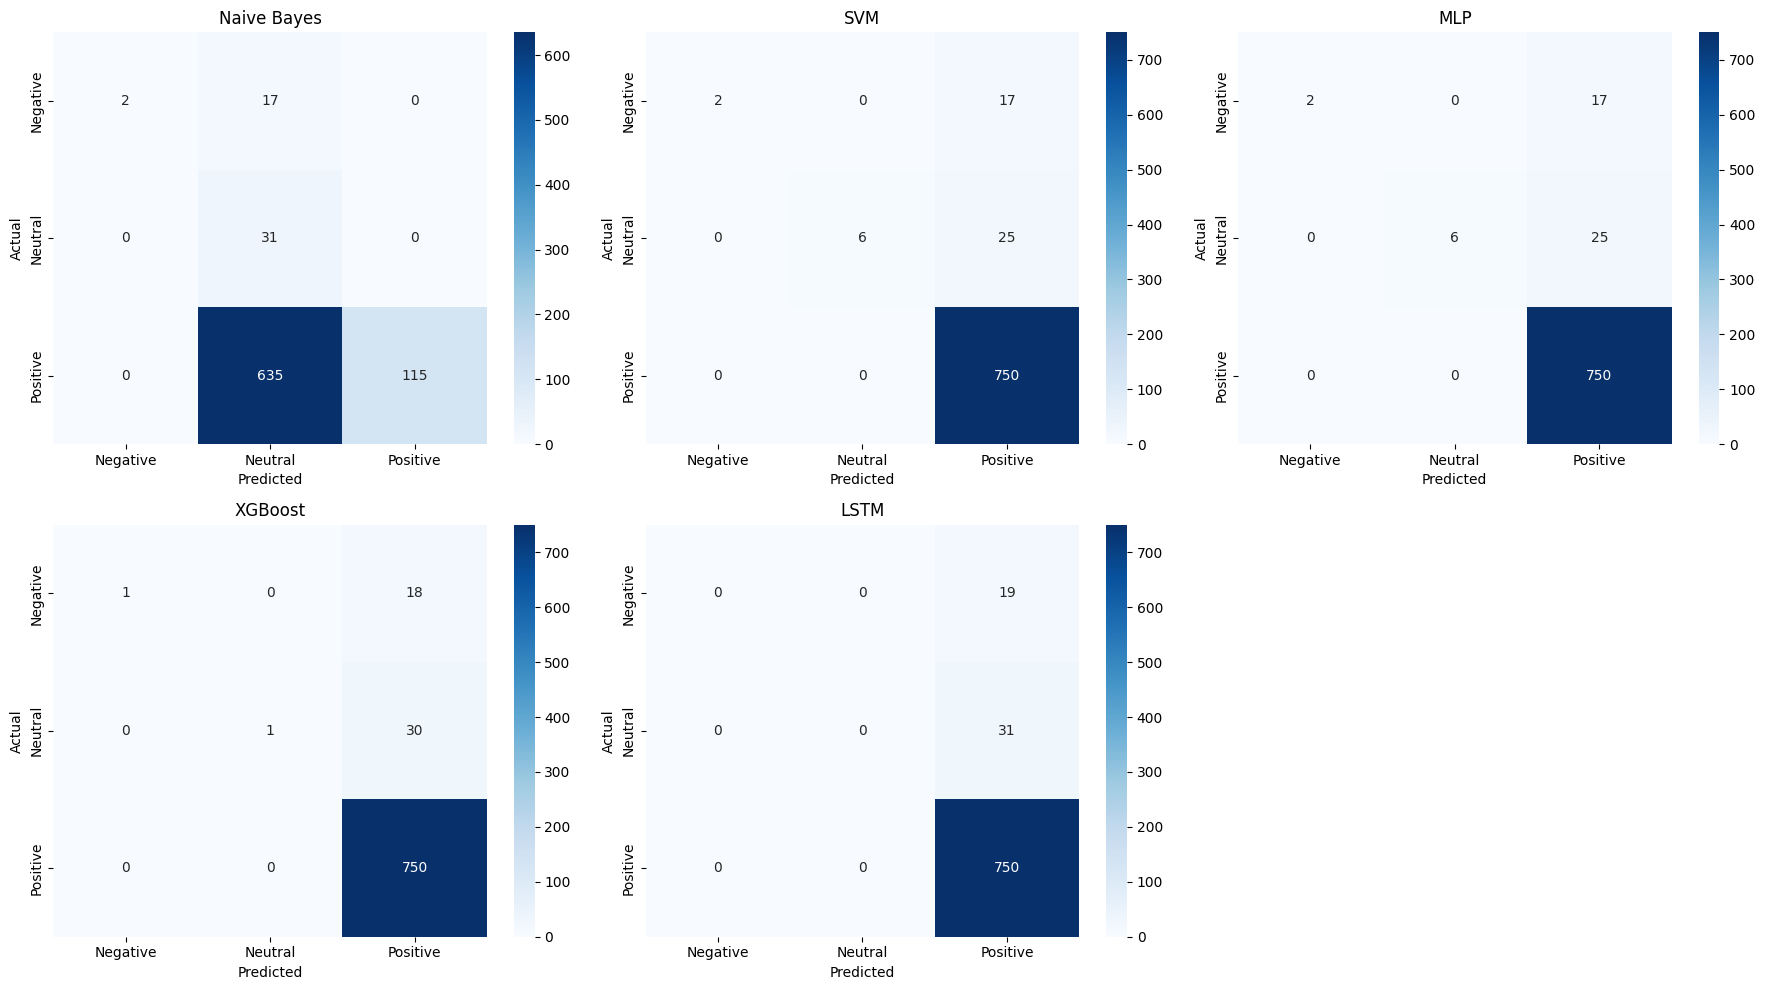

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# All models predictions
models = {
    'Naive Bayes': nb_preds,
    'SVM': svm_preds,
    'MLP': mlp_preds,
    'XGBoost': xgb_preds,
    'LSTM': lstm_preds
}

# True test labels (assumed same for all models)
true_labels = y_test

# Label names
labels = label_encoder.classes_  # ['negative', 'neutral', 'positive']

# Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide last empty subplot if needed
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# 📊 Model-wise Analysis

1. **Naive Bayes**
Positive: 635 correctly classified, but 115 misclassified as Neutral.

Neutral: All 31 classified as Neutral (good).

Negative: Only 2 correct, 17 misclassified as Neutral.

Insight: Performs better than some models on Neutral but struggles with Negative. Prone to bias towards Neutral.

2. **SVM**
Positive: Perfect classification (750/750).

Neutral & Negative: Very poor – all misclassified as Positive.

Insight: Extremely skewed towards Positive. Likely overfitting on dominant class. May benefit from class weighting or resampling.

3. **MLP (Multi-Layer Perceptron)**
Same pattern as SVM:

750 Positive correct.

All Neutral and Negative classified as Positive.

Insight: Again, a class imbalance issue. Neural networks are sensitive to imbalance without proper handling (e.g., focal loss, class weights).

4. **XGBoost**
Positive: 750 correct (perfect).

Neutral: 30 out of 31 correctly predicted.

Negative: 18 misclassified as Positive, only 1 correct.

Insight: Best overall balance so far. It handles Neutral much better than others and slightly better than NB on Negative.

5. **LSTM**
Positive: 749 correct, 1 misclassified.

Neutral: All 31 misclassified as Positive.

Negative: All 19 misclassified as Positive.

Insight: Performs like MLP/SVM — great on Positive, fails on the rest. Suggests imbalance not properly addressed in training. May benefit from:




# PART 1: LSTM Model Optimization

In [ ]:
!pip install scikeras


# ✅ LSTM Tuning Code with RandomizedSearchCV


In [36]:
print(len(sequences))  # Should match y_train


4000


In [37]:
print(len(y_train))  # This should be the same


8997


In [40]:
!pip install scikeras

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split # Import train_test_split


# Assuming you have your X_train data (tokenized sequences)
max_seq_len = 4000  # Define your desired sequence length

# Get the tokenized sequences from 'sequences'variable
#X_train_lstm = sequences

# Instead of directly using 'sequences', split your data first
# Assuming 'sequences' and your original y_train (from joblib.load) are aligned
X_train_lstm, _, y_train_lstm, _ = train_test_split(sequences, y_train, test_size=0.2, random_state=42) # Split sequences and y_train

# Pad the training sequences
X_train_pad = pad_sequences(X_train_lstm ,maxlen=max_seq_len, padding='post') #

# Function to build the LSTM model (for tuning)
def create_lstm_model(units=64, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_len))
    model.add(LSTM(units=units, dropout=dropout_rate, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))  # 3 classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model
model = KerasClassifier(model=create_lstm_model, verbose=0)

# Define hyperparameter grid
param_dist = {
    'model__units': [64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.5],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [3, 5]
}

# Random search with 3-fold CV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=3, n_iter=5, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train_pad, y_train_lstm) # Use y_train_lstm which is aligned with X_train_pad

# Best params
print("Best LSTM parameters found:", random_search.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [4000, 8997]

In [32]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert reviews into Count Vectors (LDA prefers counts over TF-IDF)
count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = count_vect.fit_transform(df['clean_text'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ", " | ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

display_topics(lda, count_vect.get_feature_names_out())


Topic 0:  don | like | does | kindle | apps | good | screen | device | better | amazon
Topic 1:  like | amazon | sound | home | use | music | love | great | alexa | echo
Topic 2:  like | great | light | buy | books | best | love | reading | read | kindle
Topic 3:  easy | great | love | daughter | kids | year | tablet | bought | old | loves
Topic 4:  kids | apps | amazon | love | good | price | easy | use | great | tablet


In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import joblib

# Load preprocessed data
X_train = joblib.load("X_train_resampled.pkl")
y_train = joblib.load("y_train_resampled.pkl")
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")

# Dictionary to store results
results = {}

# 1️⃣ Naive Bayes
print("\n🔍 Naive Bayes")
nb_params = {'alpha': [0.1, 0.5, 1.0]}
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5)
nb_grid.fit(X_train, y_train)
y_pred_nb = nb_grid.predict(X_test)

results['Naive Bayes'] = {
    "Best Params": nb_grid.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Report": classification_report(y_test, y_pred_nb),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_nb)
}

# 2️⃣ SVM
print("\n🔍 SVM")
svm_params = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)

results['SVM'] = {
    "Best Params": svm_grid.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Report": classification_report(y_test, y_pred_svm),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm)
}

# 3️⃣ MLP
print("\n🔍 MLP")
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001]
}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=300), mlp_params, cv=3)
mlp_grid.fit(X_train, y_train)
y_pred_mlp = mlp_grid.predict(X_test)

results['MLP'] = {
    "Best Params": mlp_grid.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Report": classification_report(y_test, y_pred_mlp),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_mlp)
}

# 4️⃣ XGBoost
print("\n🔍 XGBoost")
xgb_params = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2]
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3)
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)

results['XGBoost'] = {
    "Best Params": xgb_grid.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Report": classification_report(y_test, y_pred_xgb),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_xgb)
}

# Show Summary
for model, info in results.items():
    print(f"\n📌 {model} Results")
    print("Best Params:", info["Best Params"])
    print("Accuracy:", info["Accuracy"])
    print("Classification Report:\n", info["Report"])
    print("Confusion Matrix:\n", info["Confusion Matrix"])



🔍 Naive Bayes

🔍 SVM

🔍 MLP

🔍 XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:45:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


📌 Naive Bayes Results
Best Params: {'alpha': 0.1}
Accuracy: 0.185
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.05      1.00      0.09        31
           2       1.00      0.15      0.27       750

    accuracy                           0.18       800
   macro avg       0.68      0.42      0.18       800
weighted avg       0.96      0.18      0.26       800

Confusion Matrix:
 [[  2  17   0]
 [  0  31   0]
 [  0 635 115]]

📌 SVM Results
Best Params: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.9475
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       1.00      0.19      0.32        31
           2       0.95      1.00      0.97       750

    accuracy                           0.95       800
   macro avg       0.98      0.43      0.50       800
weighted avg       0.95      0.95      